# Importing Libraries

In [ ]:
import torch
from torch import nn
from matplotlib import pyplot as plt

print(torch.__version__)

2.0.1+cu118


# Creating a Sample Linear-Based Data

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).reshape(shape=(-1, 1))

y = weight * X + bias

In [ ]:
print(X.shape, y.shape)
print(X[:10], y[10:])

torch.Size([100, 1]) torch.Size([100, 1])
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]]) tensor([[0.3700],
        [0.3770],
        [0.3840],
        [0.3910],
        [0.3980],
        [0.4050],
        [0.4120],
        [0.4190],
        [0.4260],
        [0.4330],
        [0.4400],
        [0.4470],
        [0.4540],
        [0.4610],
        [0.4680],
        [0.4750],
        [0.4820],
        [0.4890],
        [0.4960],
        [0.5030],
        [0.5100],
        [0.5170],
        [0.5240],
        [0.5310],
        [0.5380],
        [0.5450],
        [0.5520],
        [0.5590],
        [0.5660],
        [0.5730],
        [0.5800],
        [0.5870],
        [0.5940],
        [0.6010],
        [0.6080],
        [0.6150],
        [0.6220],
        [0.6290],
        [0.6360],
        [0.6430],
        [0.6500],
        [0.6570],
        [0.6640],
   

In [ ]:
X[:10, 0], y[:10, 0]

(tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
         0.0900]),
 tensor([0.3000, 0.3070, 0.3140, 0.3210, 0.3280, 0.3350, 0.3420, 0.3490, 0.3560,
         0.3630]))

# Splitting Data into Training and Testing Sets

In [ ]:
train_fraction = 0.80
train_split = int(train_fraction * X.shape[0])

In [ ]:
train_split

80

In [ ]:
X_train, y_train = X[:train_split, :], y[:train_split, :]
X_test, y_test = X[train_split:, :], y[train_split:, :]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

# Creating Data Visualization Function

In [ ]:
def plot_predictions(train_data = X_train, test_data = X_test,
                     train_label = y_train, test_label = y_test,
                     predictions = None):
  fig, ax = plt.subplots(figsize=(10, 7))
  ax.scatter(train_data[:, 0], train_label[:, 0],
             s=5, c="b", label="Training Data")
  ax.scatter(test_data[:, 0], test_label[:, 0],
             s=5, c="g", label="Testing Data")
  if predictions is not None:
    ax.scatter(test_data[:, 0], predictions[:, 0],
               s=5, c="r", label="Predictions")
  ax.legend()
  return fig, ax

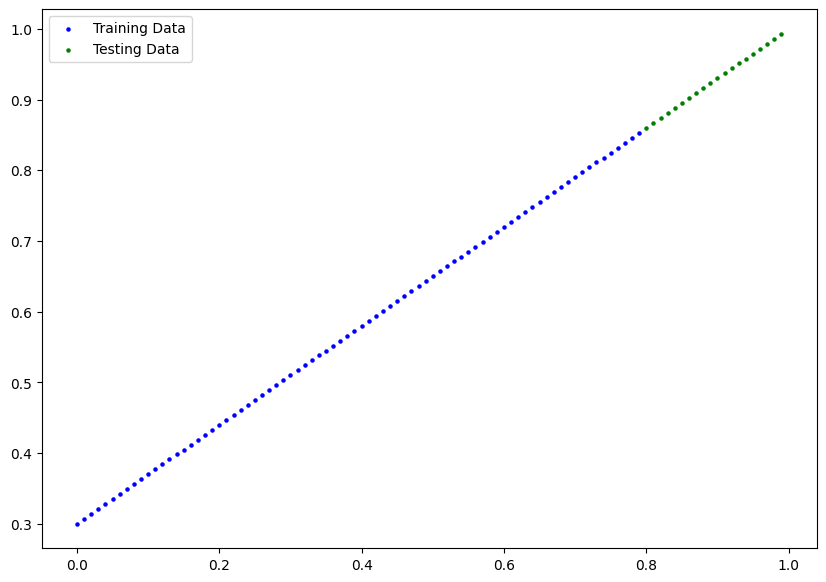

In [ ]:
fig, ax = plot_predictions()

# Build Model

In [ ]:
class LinearRegressionModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(
        data=torch.randn(1, dtype=torch.float32, requires_grad=True),
        requires_grad=True
    )
    self.bias = nn.Parameter(
        data=torch.randn(1, dtype=torch.float32, requires_grad=True),
        requires_grad=True
    )

  def forward(self, x):
    result = self.weights * x + self.bias
    return result

# Checking The Contents of The Model

In [ ]:
random_seed = 100

torch.manual_seed(random_seed)
model = LinearRegressionModel()

print(list(model.parameters()))
print(model.state_dict())

[Parameter containing:
tensor([0.3607], requires_grad=True), Parameter containing:
tensor([-0.2859], requires_grad=True)]
OrderedDict([('weights', tensor([0.3607])), ('bias', tensor([-0.2859]))])


# Making predictions with torch.inference_mode()

In [ ]:
model.eval()

with torch.inference_mode():
  y_pred = model(X_test)

In [ ]:
y_pred.shape

torch.Size([20, 1])

In [ ]:
y_pred

tensor([[0.0026],
        [0.0062],
        [0.0098],
        [0.0134],
        [0.0170],
        [0.0206],
        [0.0242],
        [0.0278],
        [0.0315],
        [0.0351],
        [0.0387],
        [0.0423],
        [0.0459],
        [0.0495],
        [0.0531],
        [0.0567],
        [0.0603],
        [0.0639],
        [0.0675],
        [0.0711]])

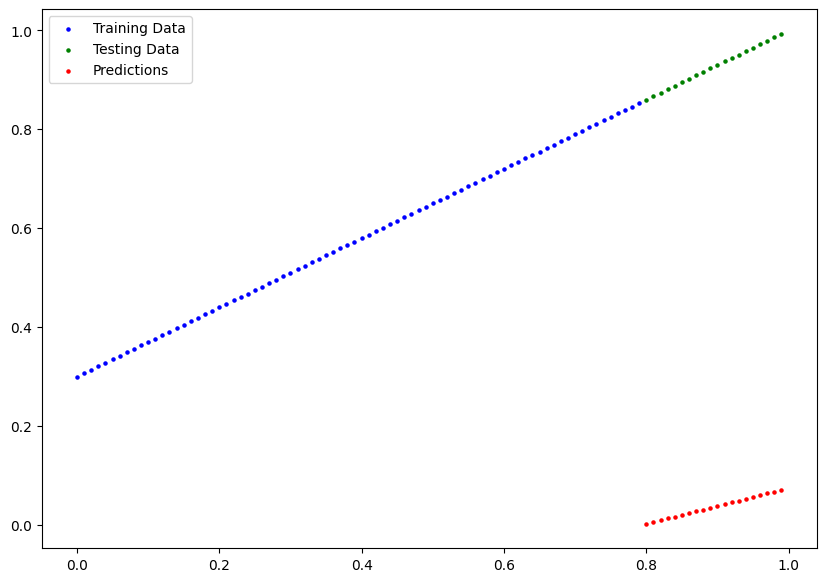

In [ ]:
fig, ax = plot_predictions(predictions=y_pred)

# Train Model

In [ ]:
loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

In [ ]:
epochs = 25

for epoch in range(epochs):
  model.train()
  y_pred = model(X_train)
  loss = loss_function(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()

In [ ]:
print(model.state_dict())

OrderedDict([('weights', tensor([0.6349])), ('bias', tensor([0.3791]))])


In [ ]:
with torch.inference_mode():
  y_pred = model(X_test)

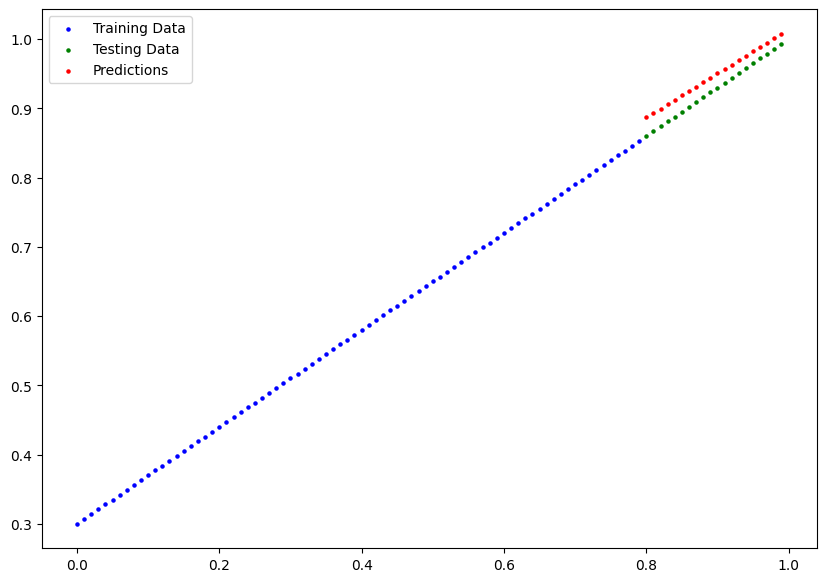

In [ ]:
fig, ax = plot_predictions(predictions=y_pred)

# Train a Model In a Device Agnostic Way

## Importing Libraries

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

print(torch.__version__)

2.0.1+cu118


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## Creating and Splitting Dataset

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).reshape(shape=(-1, 1))

y = weight * X + bias

In [ ]:
train_ratio = 0.8

index_split = int(0.8 * X.shape[0])
X_train, y_train = X[:index_split], y[:index_split]
X_test, y_test = X[index_split:], y[index_split:]

In [ ]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

## Creating and Training A Simple NN Model

In [ ]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        result = self.linear_layer(x)
        return result

In [ ]:
random_seed_value = 42

torch.manual_seed(random_seed_value)
model = LinearRegressionModel()

In [ ]:
model

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
next(model.parameters()).device

device(type='cpu')

In [ ]:
model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(model.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.001)

In [ ]:
number_epochs = 1500

epoch_values = [None] * number_epochs
train_loss_values = [None] * number_epochs
test_loss_values = [None] * number_epochs

for index_epoch in range(number_epochs):
    model.train()

    y_pred_train = model(X_train)
    loss_train = loss_function(y_pred_train, y_train)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    model.eval()

    with torch.inference_mode():
        y_pred_test = model(X_test)
        loss_test = loss_function(y_pred_test, y_test)

    epoch_values[index_epoch] = index_epoch
    train_loss_values[index_epoch] = loss_train
    test_loss_values[index_epoch] = loss_test

    if index_epoch % 50 == 0:
        print(f"{index_epoch}:     Train Loss: {loss_train.item():.6f}     Test Loss: {loss_test.item():.6f}")

print("Done")

0:     Train Loss: 0.555501     Test Loss: 0.586416
50:     Train Loss: 0.497700     Test Loss: 0.518741
100:     Train Loss: 0.439899     Test Loss: 0.451065
150:     Train Loss: 0.382099     Test Loss: 0.383390
200:     Train Loss: 0.324298     Test Loss: 0.315714
250:     Train Loss: 0.266498     Test Loss: 0.248038
300:     Train Loss: 0.208697     Test Loss: 0.180363
350:     Train Loss: 0.150896     Test Loss: 0.112687
400:     Train Loss: 0.093096     Test Loss: 0.045012
450:     Train Loss: 0.037079     Test Loss: 0.021147
500:     Train Loss: 0.024447     Test Loss: 0.045421
550:     Train Loss: 0.022000     Test Loss: 0.048744
600:     Train Loss: 0.020230     Test Loss: 0.046652
650:     Train Loss: 0.018516     Test Loss: 0.042828
700:     Train Loss: 0.016802     Test Loss: 0.039003
750:     Train Loss: 0.015089     Test Loss: 0.035179
800:     Train Loss: 0.013375     Test Loss: 0.031354
850:     Train Loss: 0.011661     Test Loss: 0.027495
900:     Train Loss: 0.009948  

In [ ]:
epoch_values = np.array(epoch_values)
train_loss_values = torch.Tensor(train_loss_values).numpy()
test_loss_values = torch.Tensor(test_loss_values).numpy()

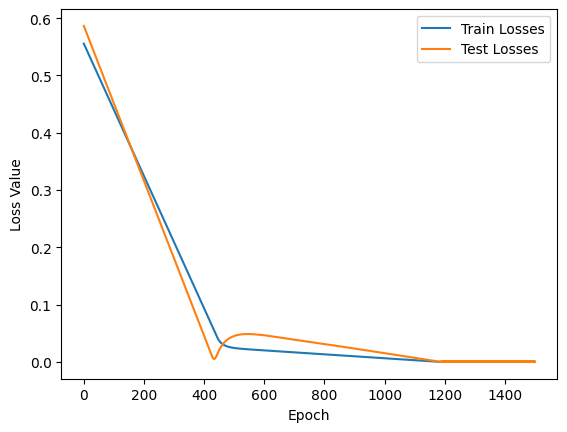

In [ ]:
fig, ax = plt.subplots()

ax.plot(epoch_values, train_loss_values, label="Train Losses")
ax.plot(epoch_values, test_loss_values, label="Test Losses")

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss Value")
ax.legend()

## Plotting The Results

In [ ]:
def plot_predictions(train_data = X_train, test_data = X_test,
                     train_label = y_train, test_label = y_test,
                     predictions = None):
  fig, ax = plt.subplots(figsize=(10, 7))
  ax.scatter(train_data[:, 0], train_label[:, 0],
             s=5, c="b", label="Training Data")
  ax.scatter(test_data[:, 0], test_label[:, 0],
             s=5, c="g", label="Testing Data")
  if predictions is not None:
    ax.scatter(test_data[:, 0], predictions[:, 0],
               s=5, c="r", label="Predictions")
  ax.legend()
  return fig, ax

In [ ]:
model.eval()

with torch.inference_mode():
    y_preds = model(X_test)

(<Figure size 1000x700 with 1 Axes>, <Axes: >)

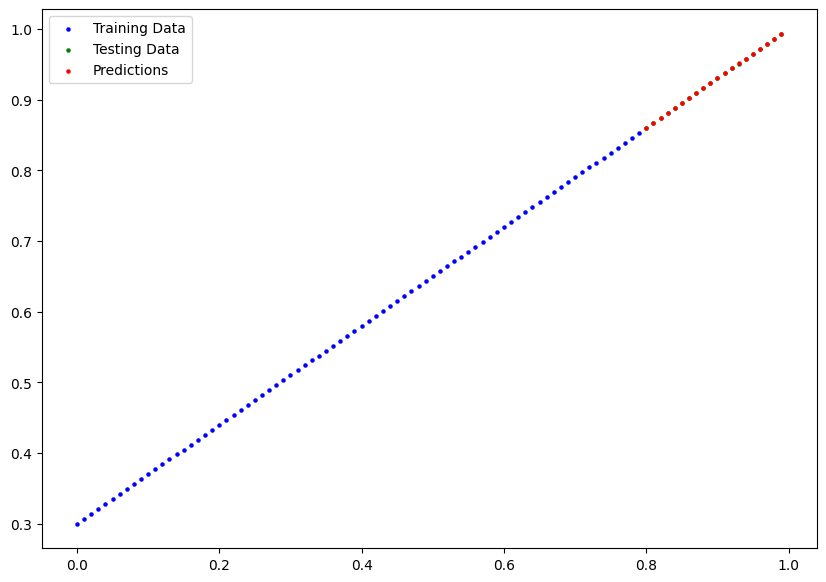

In [ ]:
plot_predictions(train_data = X_train.cpu(), test_data = X_test.cpu(),
                 train_label = y_train.cpu(), test_label = y_test.cpu(),
                 predictions = y_preds.cpu())

## Saving PyTorch Models

In [ ]:
models_directories = Path("./models").resolve()
model_file_name = "linear_regression_model.pth"

model_file_path = models_directories / model_file_name

models_directories.mkdir(parents=True, exist_ok=True)

with open(file=model_file_path, mode="wb") as model_file:
    torch.save(obj=model.state_dict(), f=model_file)

## Loading PyTorch Models

In [ ]:
models_directories = Path("./models").resolve()
model_file_name = "linear_regression_model.pth"

model_file_path = models_directories / model_file_name

In [ ]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        result = self.linear_layer(x)
        return result

In [ ]:
model_loaded = LinearRegressionModel()

In [ ]:
model_loaded.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.2343]])),
             ('linear_layer.bias', tensor([0.9186]))])

In [ ]:
with open(file=model_file_path, mode="rb") as model_file:
    model_state_dict = torch.load(f=model_file)

model.load_state_dict(state_dict=model_state_dict)

<All keys matched successfully>

In [ ]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6997]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3004], device='cuda:0'))])